In [13]:
import random
import pandas as pd
from build_data import *
from find_shortest_path import *
import matplotlib.pyplot as plt

In [2]:
maps,_ = build_data()

In [3]:
stations=pd.read_csv("london/underground_stations.csv")

In [4]:
def calc(method,start,end,heuristic=None):
    method_called=globals().get("get_path_"+method,None)
    time=0
    count=0
    length=0
    if(method=='Astar' or method=='biAstar'):
        heuristic_called=globals().get(heuristic+"_Distance",None)
        for _ in range(10):
            t,count,length,_=method_called(start,end,maps,heuristic_called)
            time+=t
        return time/10,count,length
    elif method=="BellmanFord":
        time,count,length,_=method_called(start,end,maps)
        return time,count,length
    else:
        for _ in range(10):
            t,count,length,_=method_called(start,end,maps)
            time+=t
        return time/100,count,length

In [5]:
time_columns = ['start_station', 'end_station', 'greedyBFS', 'BellmanFord', 'Dijkstra', 'Astar_Great_Circle', 'Astar_Euclidean', 'Astar_Manhattan', 'Astar_Chebyshev', 'biAstar_Great_Circle', 'biAstar_Euclidean', 'biAstar_Manhattan', 'biAstar_Chebyshev']
iterations_columns = ['start_station', 'end_station', 'greedyBFS', 'BellmanFord', 'Dijkstra', 'Astar_Great_Circle', 'Astar_Euclidean', 'Astar_Manhattan', 'Astar_Chebyshev', 'biAstar_Great_Circle', 'biAstar_Euclidean', 'biAstar_Manhattan', 'biAstar_Chebyshev']
length_columns = ['start_station', 'end_station', 'greedyBFS', 'BellmanFord', 'Dijkstra', 'Astar_Great_Circle', 'Astar_Euclidean', 'Astar_Manhattan', 'Astar_Chebyshev', 'biAstar_Great_Circle', 'biAstar_Euclidean', 'biAstar_Manhattan', 'biAstar_Chebyshev']

time_df = pd.DataFrame(columns=time_columns)
iterations_df = pd.DataFrame(columns=iterations_columns)
length_df = pd.DataFrame(columns=length_columns)

In [6]:
for i in range(50):
    id1,id2 = random.sample(range(1, 307), 2)
    start_station_name=stations.loc[id1,'name']
    end_station_name=stations.loc[id2,'name']
    t1,c1,l1=calc('greedyBFS',start_station_name,end_station_name)
    t2,c2,l2=calc('BellmanFord',start_station_name,end_station_name)
    t3,c3,l3=calc('Dijkstra',start_station_name,end_station_name)
    t4,c4,l4=calc('Astar',start_station_name,end_station_name,'Great_Circle')
    t5,c5,l5=calc('Astar',start_station_name,end_station_name,'Euclidean')
    t6,c6,l6=calc('Astar',start_station_name,end_station_name,'Manhattan')
    t7,c7,l7=calc('Astar',start_station_name,end_station_name,'Chebyshev')
    t8,c8,l8=calc('biAstar',start_station_name,end_station_name,'Great_Circle')
    t9,c9,l9=calc('biAstar',start_station_name,end_station_name,'Euclidean')
    t10,c10,l10=calc('biAstar',start_station_name,end_station_name,'Manhattan')
    t11,c11,l11=calc('biAstar',start_station_name,end_station_name,'Chebyshev')
    
    time_data = [start_station_name, end_station_name, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]
    iterations_data = [start_station_name, end_station_name, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11]
    length_data = [start_station_name, end_station_name, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11]

    time_df = pd.concat([time_df, pd.DataFrame([time_data], columns=time_columns)], ignore_index=True)
    iterations_df = pd.concat([iterations_df, pd.DataFrame([iterations_data], columns=iterations_columns)], ignore_index=True)
    length_df = pd.concat([length_df, pd.DataFrame([length_data], columns=length_columns)], ignore_index=True)

In [7]:
time_df

,start_station,end_station,greedyBFS,BellmanFord,Dijkstra,Astar_Great_Circle,Astar_Euclidean,Astar_Manhattan,A_star_Chebyshev,biAstar_Great_Circle,biAstar_Euclidean,biAstar_Manhattan,biAstar_Chebyshev
0,East Acton,West Silvertown,0.004132,35.719808,0.010040,0.060352,0.072224,0.062262,0.078824,0.023893,0.029833,0.032572,0.026894
1,Burnt Oak,Walthamstow Central,0.379770,35.785612,0.008247,0.020294,0.024576,0.017681,0.043136,0.018059,0.021931,0.023152,0.016355
2,West Silvertown,Alperton,0.005546,35.661086,0.010799,0.118575,0.139762,0.155210,0.144638,0.054516,0.066972,0.090196,0.055607
3,Gants Hill,North Greenwich,0.001224,35.798608,0.001461,0.007469,0.009206,0.008584,0.009836,0.010264,0.012705,0.013580,0.016553
4,Theydon Bois,Blackfriars,0.004344,35.746847,0.003542,0.018399,0.022535,0.015733,0.025648,0.017465,0.021652,0.015146,0.034718
5,West Kensington,Colliers Wood,0.003911,35.724505,0.008267,0.026520,0.032058,0.038321,0.036560,0.022373,0.027304,0.024676,0.029020
6,Goldhawk Road,Holborn,0.001938,35.703998,0.003995,0.020858,0.025240,0.017425,0.029287,0.032485,0.039358,0.028270,0.038814
7,Custom House,Tottenham Court Road,0.002339,35.727772,0.004080,0.012144,0.015098,0.014233,0.016252,0.014207,0.017874,0.018164,0.016090
8,Dagenham East,Canning Town,0.000599,35.543842,0.000501,0.005412,0.006634,0.006624,0.006629,0.011088,0.013668,0.008986,0.013661
9,Kilburn,Bermondsey,0.002793,35.677898,0.006084,0.020821,0.025242,0.015493,0.039739,0.021452,0.026256,0.027260,0.028172


In [8]:
iterations_df

,start_station,end_station,greedyBFS,BellmanFord,Dijkstra,Astar_Great_Circle,Astar_Euclidean,Astar_Manhattan,A_star_Chebyshev,biAstar_Great_Circle,biAstar_Euclidean,biAstar_Manhattan,biAstar_Chebyshev
0,East Acton,West Silvertown,46,93330,238,80,79,68,90,15,15,15,14
1,Burnt Oak,Walthamstow Central,6265,93330,188,34,34,23,54,16,16,17,12
2,West Silvertown,Alperton,74,93330,268,183,183,198,195,35,35,45,29
3,Gants Hill,North Greenwich,16,93330,36,10,10,9,11,8,8,8,9
4,Theydon Bois,Blackfriars,51,93330,87,27,27,19,32,13,13,10,20
5,West Kensington,Colliers Wood,56,93330,190,44,44,50,49,18,18,17,20
6,Goldhawk Road,Holborn,21,93330,84,27,27,18,32,21,21,15,20
7,Custom House,Tottenham Court Road,26,93330,99,16,16,14,17,9,9,10,8
8,Dagenham East,Canning Town,10,93330,14,10,10,10,10,10,10,6,10
9,Kilburn,Bermondsey,29,93330,130,23,23,12,41,13,13,11,13


In [9]:
length_df

,start_station,end_station,greedyBFS,BellmanFord,Dijkstra,Astar_Great_Circle,Astar_Euclidean,Astar_Manhattan,A_star_Chebyshev,biAstar_Great_Circle,biAstar_Euclidean,biAstar_Manhattan,biAstar_Chebyshev
0,East Acton,West Silvertown,24.361611,20.674517,20.674517,20.674517,20.674517,20.674517,20.674517,22.074401,22.074401,24.447636,20.674517
1,Burnt Oak,Walthamstow Central,24.428859,24.428859,24.428859,24.428859,24.428859,24.588241,24.428859,25.174292,25.174292,25.174292,24.428859
2,West Silvertown,Alperton,32.875609,27.726581,27.726581,27.726581,27.726581,27.726581,27.726581,28.197306,28.197306,39.491141,31.445349
3,Gants Hill,North Greenwich,16.390591,12.401144,12.401144,12.401144,12.401144,12.401144,12.401144,13.989316,13.989316,13.989849,14.519939
4,Theydon Bois,Blackfriars,29.407341,25.529938,25.529938,25.529938,25.529938,25.529938,25.529938,29.276020,29.276020,25.529938,26.290717
5,West Kensington,Colliers Wood,16.099476,15.075219,15.075219,15.075219,15.075219,15.075219,15.075219,18.618253,18.618253,17.963115,18.618253
6,Goldhawk Road,Holborn,12.154035,9.269517,9.269517,9.269517,9.269517,9.551623,9.269517,10.496471,10.496471,13.560295,10.777931
7,Custom House,Tottenham Court Road,15.668223,11.728838,11.728838,11.728838,11.728838,11.728838,11.728838,13.359566,13.359566,11.728838,11.728838
8,Dagenham East,Canning Town,12.933736,12.933736,12.933736,12.933736,12.933736,12.933736,12.933736,15.250869,15.250869,14.959768,15.250869
9,Kilburn,Bermondsey,16.866483,12.555826,12.555826,12.555826,12.555826,12.803984,12.555826,13.324939,13.324939,17.837580,13.303562


In [10]:
time_df.to_csv('output/time.csv',index=False)
iterations_df.to_csv('output/iterations.csv',index=False)
length_df.to_csv('output/length.csv',index=False)

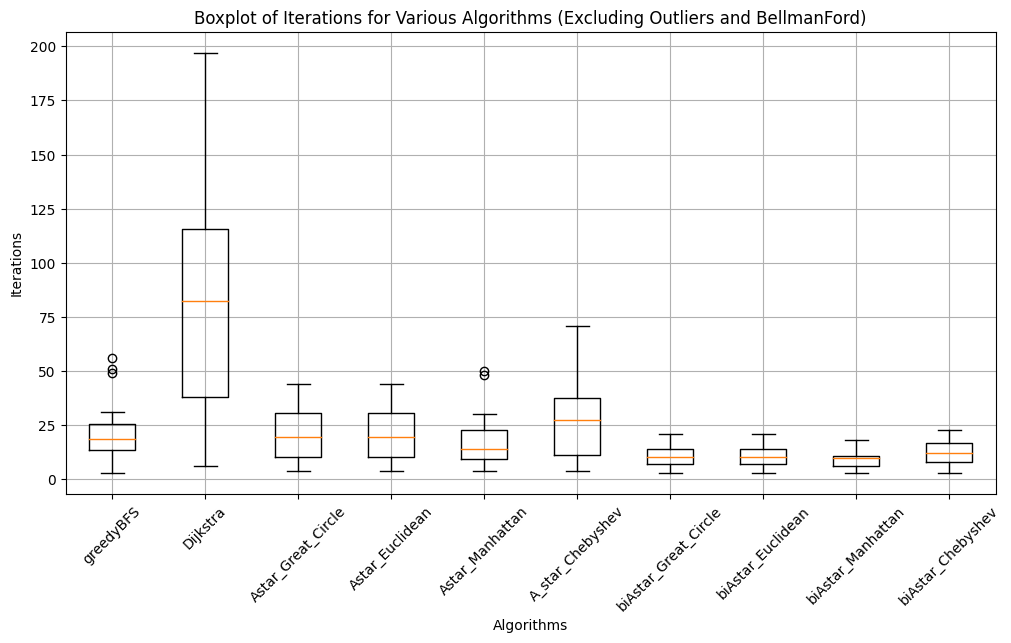

In [18]:
iterations_columns_to_plot = [col for col in iterations_df.columns if col not in ['start_station', 'end_station', 'BellmanFord']]

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the function to each column
iterations_df_no_outliers = iterations_df.copy()
for col in iterations_columns_to_plot:
    iterations_df_no_outliers = remove_outliers(iterations_df_no_outliers, col)

# Generating the boxplot without outliers
plt.figure(figsize=(12, 6))
plt.boxplot(iterations_df_no_outliers[iterations_columns_to_plot].values, labels=iterations_columns_to_plot)
plt.xticks(rotation=45)
plt.xlabel('Algorithms')
plt.ylabel('Iterations')
plt.title('Boxplot of Iterations for Various Algorithms (Excluding Outliers and BellmanFord)')
plt.grid(True)
plt.show()

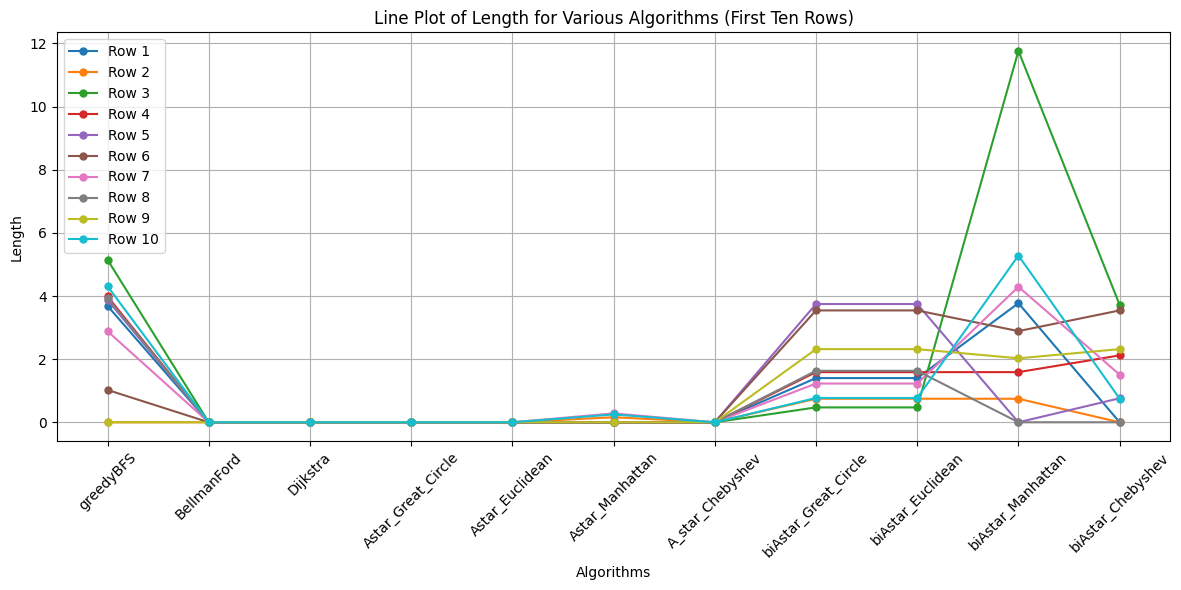

In [23]:
data_to_plot = length_df.iloc[:10, 2:]

# Get the column names as x-axis labels
x_labels = data_to_plot.columns

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot each line for the first ten rows with the same color and style
for i in range(10):
    plt.plot(x_labels, data_to_plot.iloc[i, :]-data_to_plot.iloc[i,1], label=f'Row {i+1}', marker='o', markersize=5)

# Customize the plot
plt.xlabel('Algorithms')
plt.ylabel('Length')
plt.title('Line Plot of Length for Various Algorithms (First Ten Rows)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

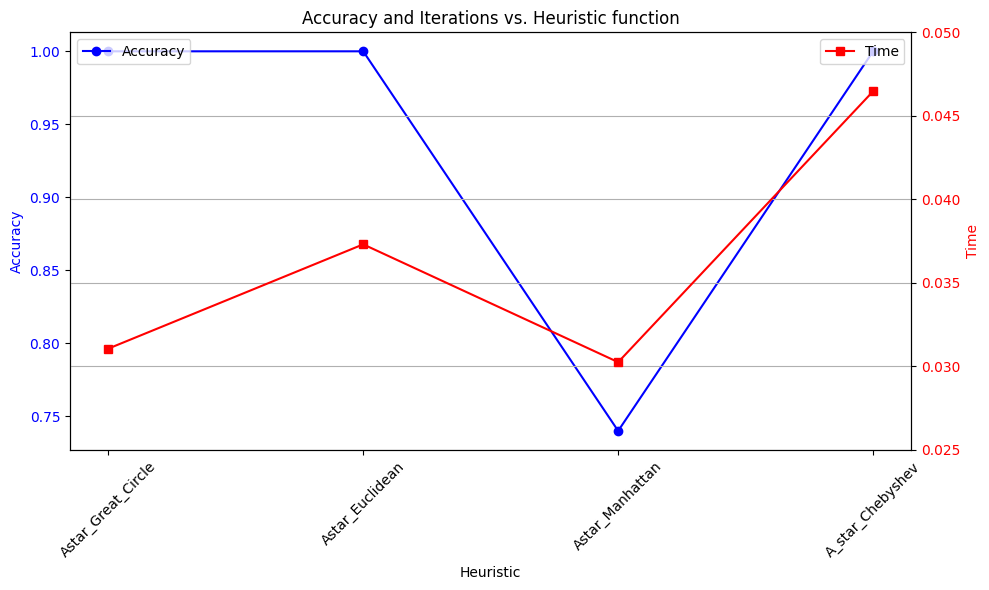

In [63]:
accuracy_df = pd.DataFrame()
for func in ['Astar_Great_Circle', 'Astar_Euclidean', 'Astar_Manhattan', 'A_star_Chebyshev']:
    accuracy_df.loc[0,func] = (length_df['Astar_Great_Circle'] == length_df[func]).sum() / len(length_df)

average_time_df =pd.DataFrame()
for func in ['Astar_Great_Circle', 'Astar_Euclidean', 'Astar_Manhattan', 'A_star_Chebyshev']:
    average_time_df.loc[0,func] = time_df[func].sum() / len(time_df)

fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制准确率数据，使用蓝色线条，标记为圆点
ax1.set_xlabel('Heuristic')
ax1.set_ylabel('Accuracy', color='blue')
ax1.plot(accuracy_df.columns[0:], accuracy_df.iloc[0], marker='o', color='blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建一个新的y轴，用于绘制迭代次数数据，使用红色线条，标记为方块
ax2 = ax1.twinx()
ax2.set_ylabel('Time', color='red')
ax2.set_ylim([0.025,0.05])
ax2.plot(average_time_df.columns[0:], average_time_df.iloc[0], marker='s', color='red', label='Time')
ax2.tick_params(axis='y', labelcolor='red')

# 设置刻度位置和标签
xticks = range(len(accuracy_df.columns[0:]))
ax1.set_xticks(xticks)
ax1.set_xticklabels(accuracy_df.columns[0:], rotation=45)

# 添加标题
plt.title('Accuracy and Iterations vs. Heuristic function')

# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
# 显示图形
plt.tight_layout()
plt.show()